In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# 导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
# 查看是否有缺失值
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# 查看有哪些类型的数据
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('bool')]

In [7]:
# 查看数据集中唯一值的个数
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Text(0.5, 1.0, 'Target distribution')

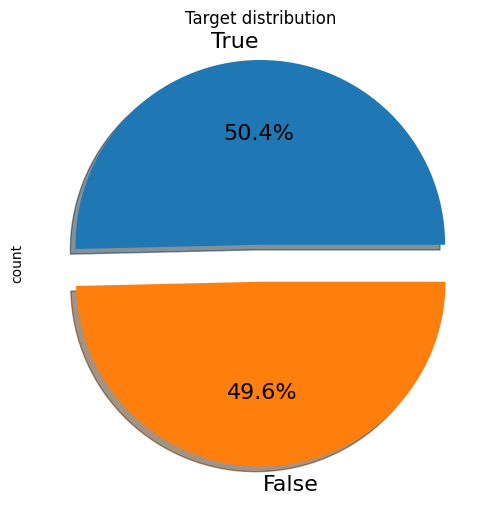

In [8]:
# 画个饼转图先看看Transported的分布情况
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
import seaborn as sns
train.Transported.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,textprops={'fontsize':16}).set_title("Target distribution")

1.连续型变量

Text(0.5, 0, 'Age years')

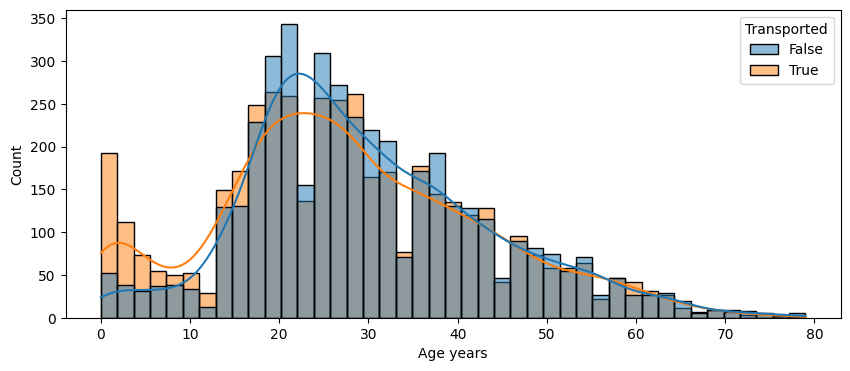

In [9]:
# Age
plt.figure(figsize=(10,4))
sns.histplot(data=train,x='Age',hue='Transported',kde=True)
plt.xlabel('Age years')

In [10]:
# 各项花费
exp_feats=['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# 创建一个新变量exp_sum
train['exp_sum']=train[exp_feats].sum(axis=1)

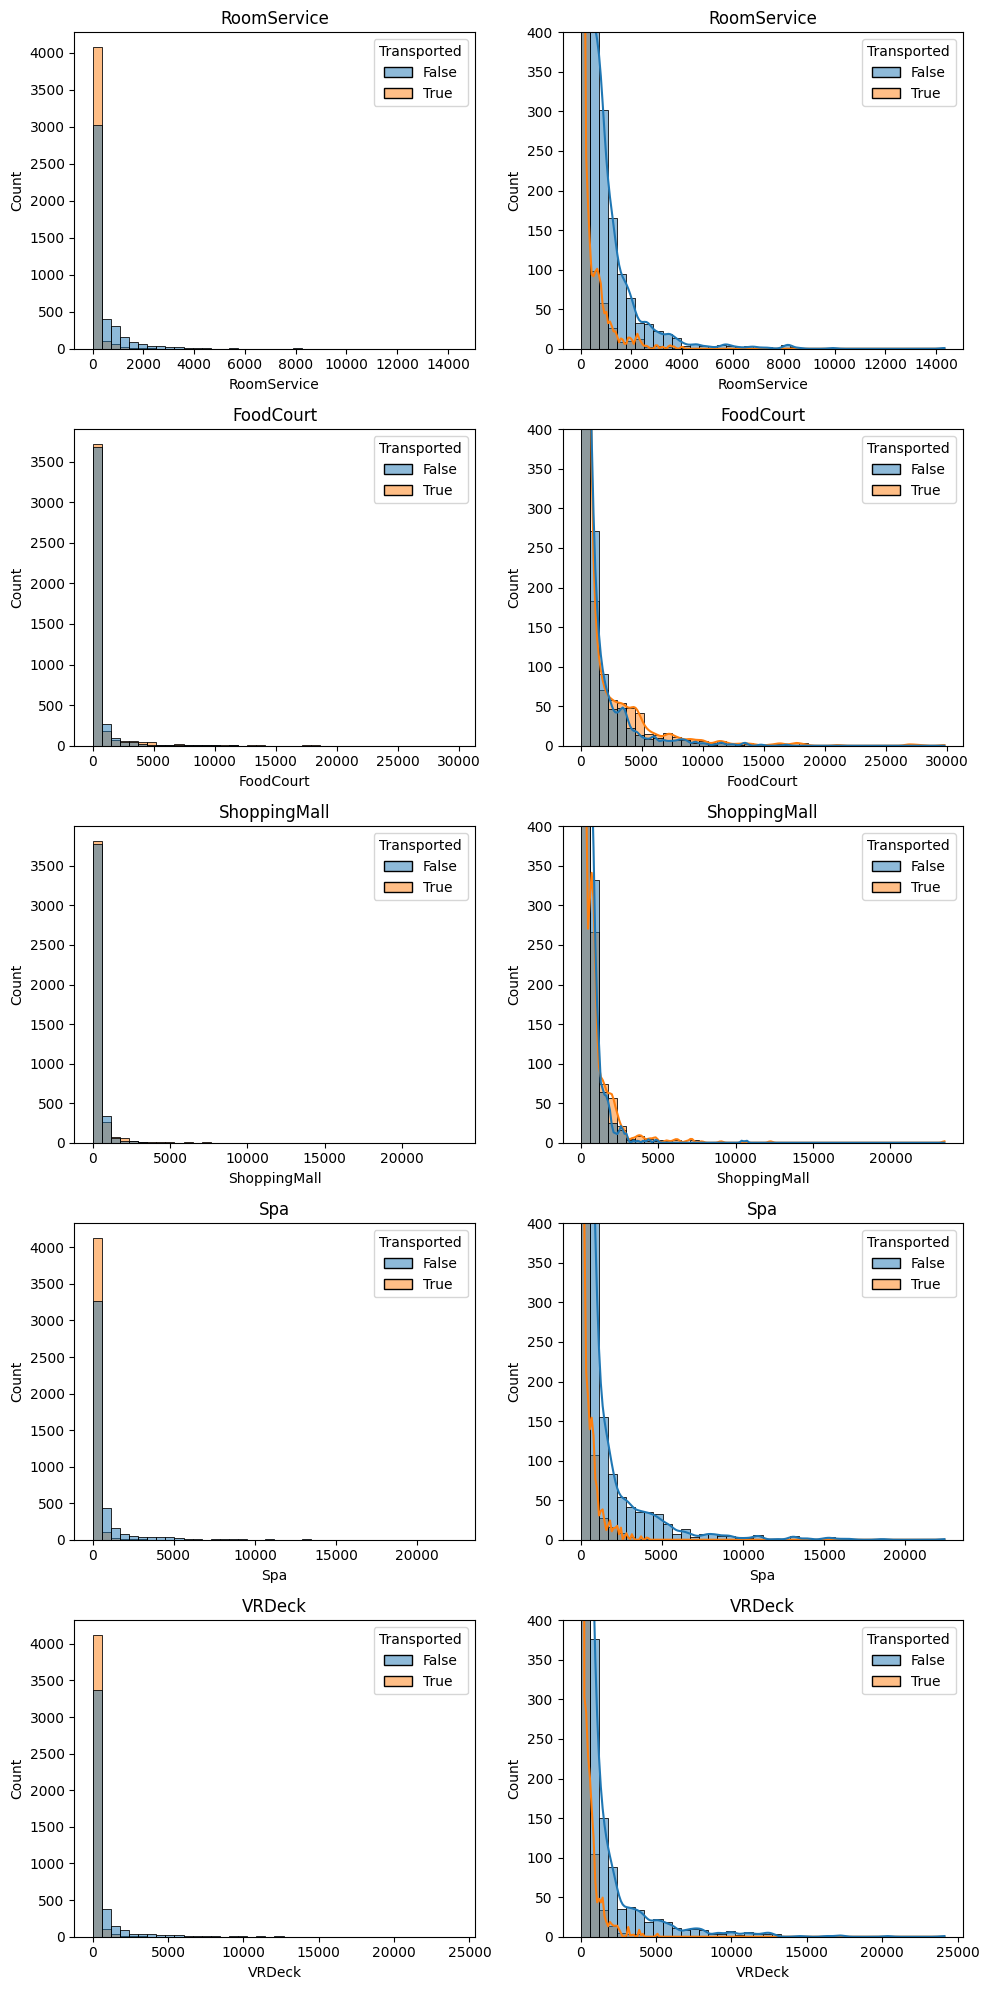

In [11]:
fig=plt.figure(figsize=(10,20))
for i,varname in enumerate(exp_feats):
    # 分割为2列，这是左边第一列
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train,x=varname,kde=False,axes=ax,hue='Transported',bins=40)
    ax.set_title(varname)

    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train,x=varname,hue='Transported',kde=True,axes=ax,bins=40)
    plt.ylim([0,400])
    ax.set_title(varname)
fig.tight_layout()
    

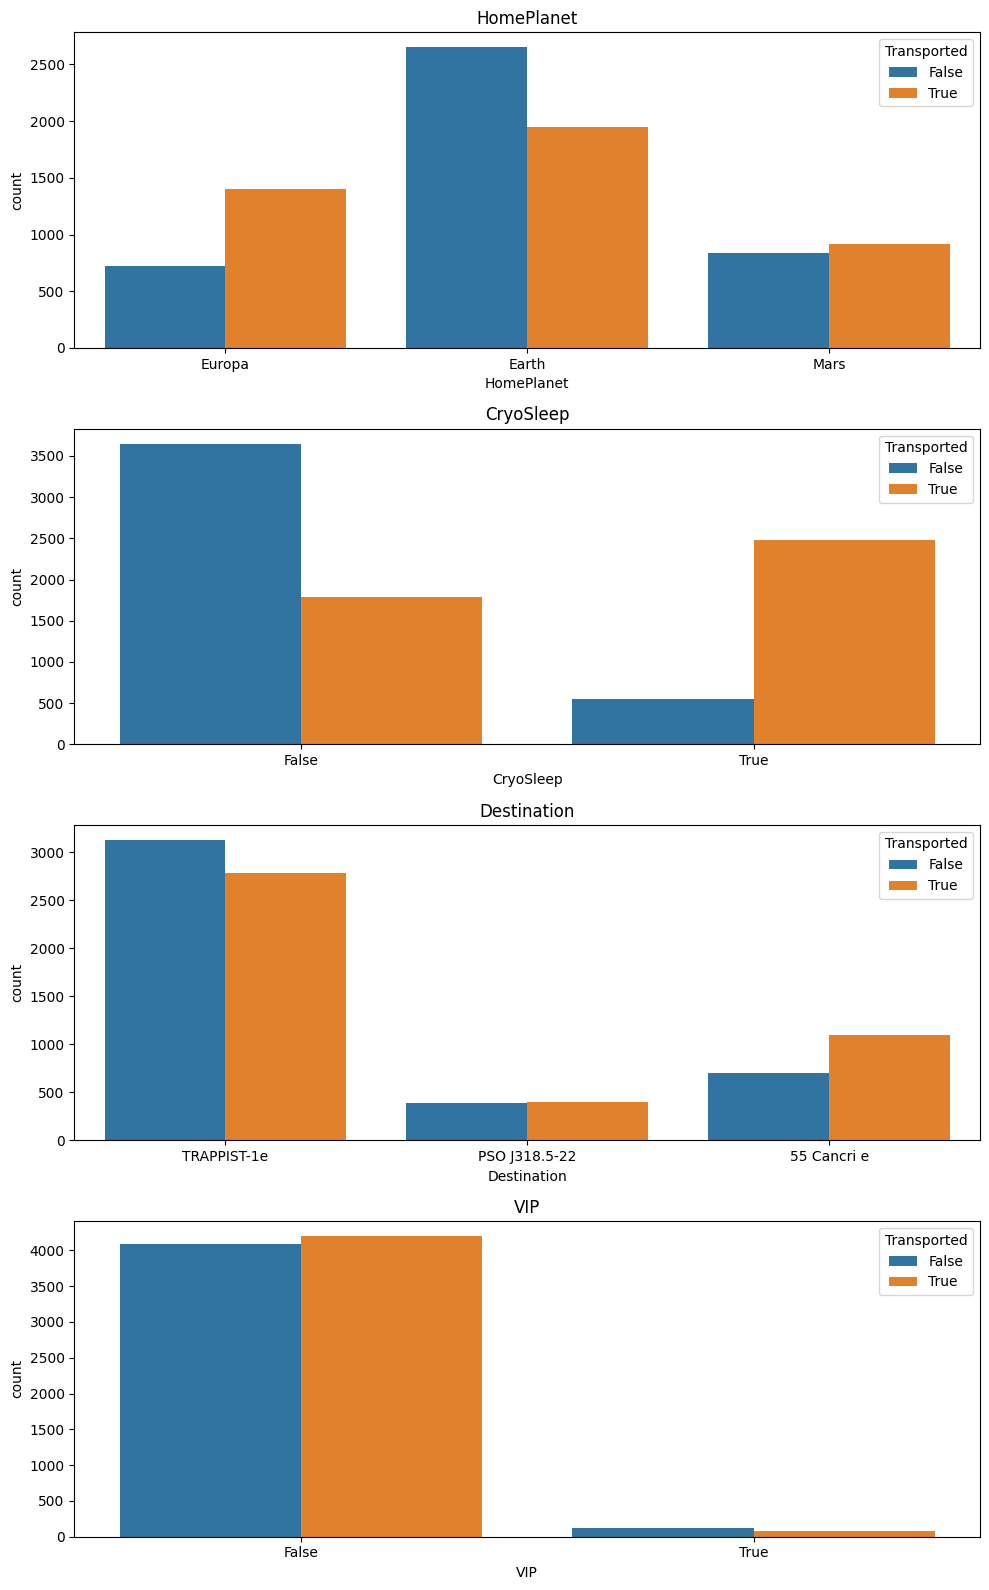

In [12]:
# 分类型变量
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig=plt.figure(figsize=(10,16))
for i,varname in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train,x=varname,ax=ax,hue='Transported')
    ax.set_title(varname)
fig.tight_layout()

In [13]:
# 定性变量的处理
qual_feats=['PassengerId', 'Cabin' ,'Name']
train[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


### 特征工程

In [14]:
# 对于Age进行处理
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0~12'
train.loc[(train['Age']>13)&(train['Age']<18),'Age_group']='Age_13~17'
train.loc[(train['Age']>=18)&(train['Age']<=25),'Age_group']='Age_18~25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26~30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31~50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0~12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13~17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18~25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26~30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31~50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

C:\Users\Admin\AppData\Local\Temp\ipykernel_9100\943373747.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0~12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[train['Age']<=12,'Age_group']='Age_0~12'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9100\943373747.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0~12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.loc[test['Age']<=12,'Age_group']='Age_0~12'


Text(0.5, 0, 'Age_group')

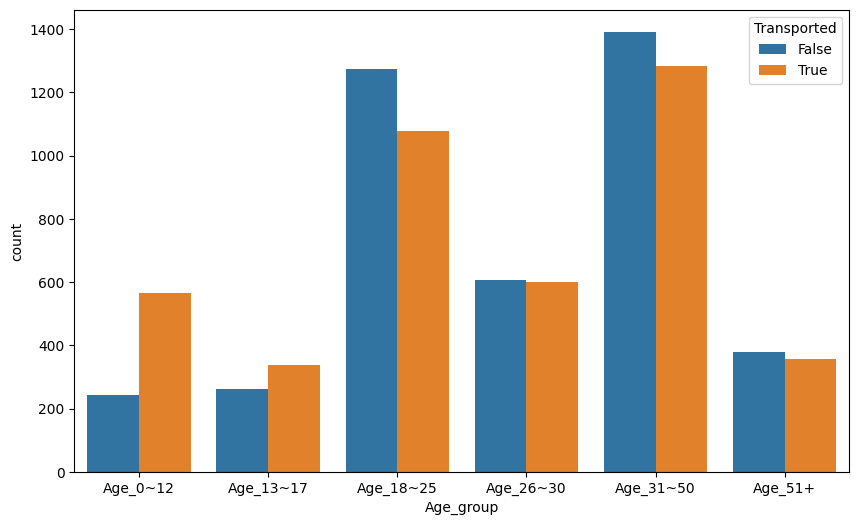

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=train,x='Age_group',hue='Transported',order=['Age_0~12','Age_13~17','Age_18~25','Age_26~30','Age_31~50','Age_51+'])
plt.xlabel('Age_group')

Text(0.5, 0, 'No_spending')

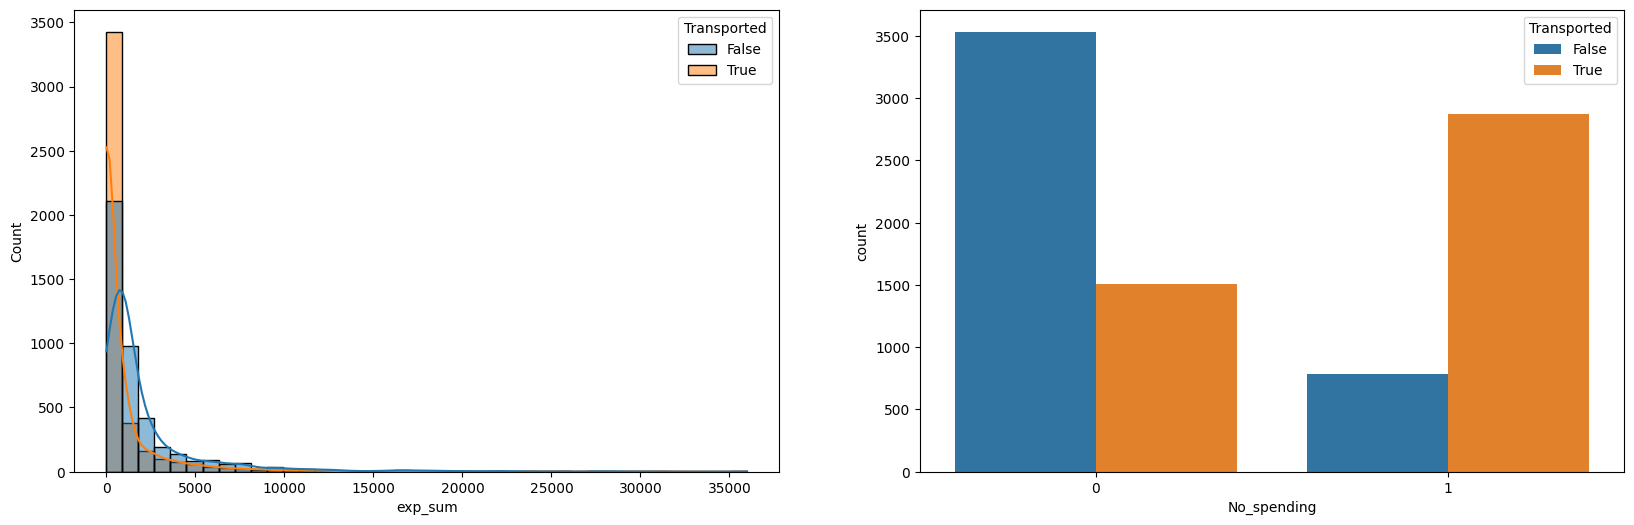

In [18]:
# 对expenditure进行处理
train['No_spending']=(train['exp_sum']==0).astype(int)
test['exp_sum']=test[exp_feats].sum(axis=1)
test['No_spending']=(test['exp_sum']==0).astype(int)

fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=train,x='exp_sum',hue='Transported',kde=True,bins=40)
plt.xlabel('exp_sum')

plt.subplot(1,2,2)
sns.countplot(data=train,x='No_spending',hue='Transported')
plt.xlabel('No_spending')

Text(0.5, 0, 'Group_size')

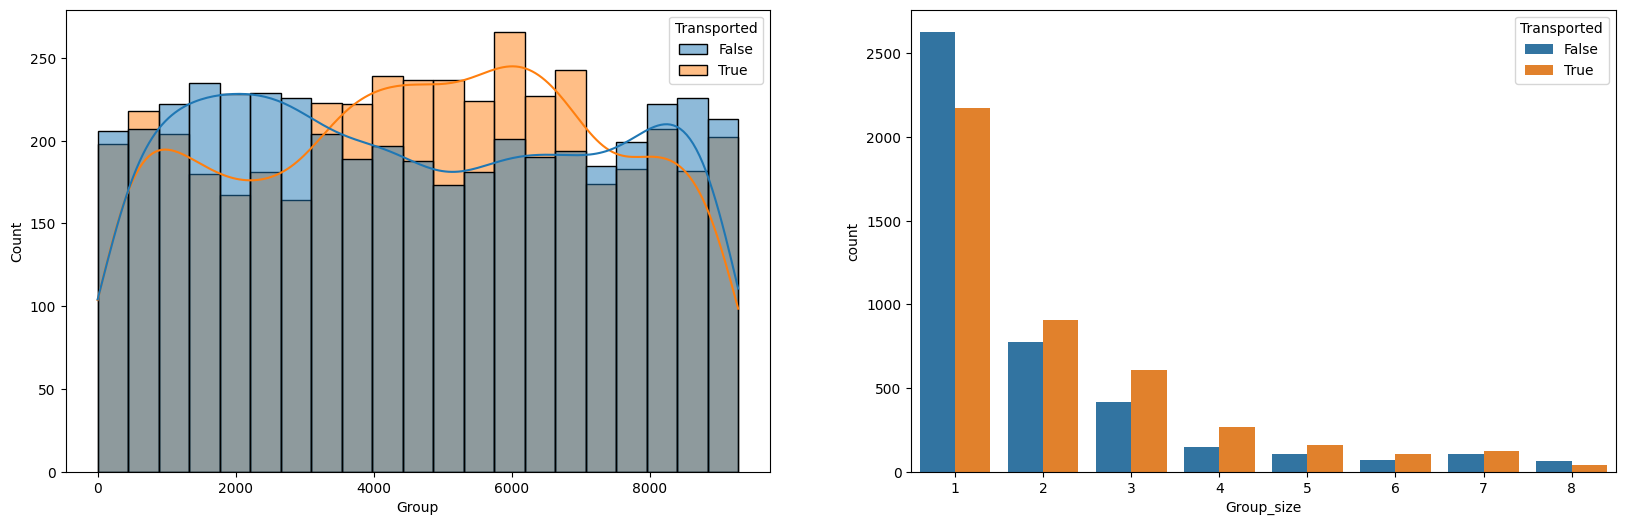

In [28]:
# 对乘客ID进行处理
train['Group']=train['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)
test['Group']=test['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)

# 在创建一个新的变量Group_size，用来表示每一个Group对应的大小是多少(与作者写的不一致)
train['Group_size']=train['Group'].map(lambda x:pd.concat([train['Group'],test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x:pd.concat([train['Group'],test['Group']]).value_counts()[x])

fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Group',hue='Transported',kde=True)
plt.xlabel('Group')

plt.subplot(1,2,2)
sns.countplot(data=train,x='Group_size',hue='Transported')
plt.xlabel('Group_size')